# 📊 Notebook 1: Exploración de Datos StatsBomb

## FIFA World Cup Qatar 2022

**Objetivos de este notebook:**
1. Conectar con StatsBomb Open Data
2. Explorar la estructura de competiciones y partidos
3. Entender los eventos de pase y datos 360°
4. Crear visualizaciones básicas
5. Preparar datos para el modelo de pases

---

## 1. Setup e Importaciones

In [2]:
import sys
sys.version

'3.10.19 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 16:41:31) [MSC v.1929 64 bit (AMD64)]'

In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Francisco\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install statsbombpy pandas numpy matplotlib seaborn mplsoccer xgboost scikit-learn tqdm

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 3.4 MB/s eta 0:00:38
   ---------------------------------------- 1.3/124.9 MB 2.7 MB/s eta 0:00:47
    --------------------------------------- 1.8/124.9 MB 2.6 MB/s eta 0:00:48
    --------------------------------------- 2.4/124.9 MB 2.6 MB/s eta 0:00:48
   - -------------------------------------- 3.1/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 3.7/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 4.2/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 4.7/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 5.0/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 5.5/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 6.0/124.9 MB 2.5 MB/s eta 0:00:48


In [5]:
# Importaciones principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch
from tqdm import tqdm
import warnings

# Configuración
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')

# Colores personalizados para el proyecto
COLORS = {
    'primary': '#1E3A5F',
    'secondary': '#2E5A8F',
    'accent': '#E63946',
    'success': '#2A9D8F',
    'warning': '#E9C46A'
}

print("✅ Librerías importadas correctamente")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ Librerías importadas correctamente
📦 Pandas version: 2.3.3
📦 NumPy version: 2.2.5


## 2. Explorar Competiciones Disponibles

StatsBomb ofrece datos gratuitos de varias competiciones. Vamos a ver cuáles están disponibles.

In [4]:
# Cargar todas las competiciones disponibles
competitions = sb.competitions()

print(f"📊 Total de competiciones/temporadas disponibles: {len(competitions)}")
print("\n" + "="*60)
competitions.head(10)

📊 Total de competiciones/temporadas disponibles: 75



,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,None,None,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,None,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154
6,16,27,Europe,Champions League,male,False,False,2015/2016,2024-06-12T07:45:38.786894,2021-06-13T16:17:31.694,None,2024-06-12T07:45:38.786894
7,16,26,Europe,Champions League,male,False,False,2014/2015,2024-02-12T12:49:54.914228,2021-06-13T16:17:31.694,None,2024-02-12T12:49:54.914228
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
9,16,24,Europe,Champions League,male,False,False,2012/2013,2024-02-12T12:47:34.340413,2021-06-13T16:17:31.694,None,2024-02-12T12:47:34.340413


In [5]:
# Filtrar competiciones con datos 360° (las más valiosas para OART)
competitions_360 = competitions[competitions['match_available_360'].notna()]

print(f"🎯 Competiciones con datos 360°: {len(competitions_360)}")
print("\nCompeticiones disponibles:")
print(competitions_360[['competition_name', 'season_name', 'competition_id', 'season_id']].to_string())

🎯 Competiciones con datos 360°: 11

Competiciones disponibles:
       competition_name season_name  competition_id  season_id
0         1. Bundesliga   2023/2024               9        281
29       FIFA World Cup        2022              43        106
38              La Liga   2020/2021              11         90
58              Ligue 1   2022/2023               7        235
59              Ligue 1   2021/2022               7        108
61  Major League Soccer        2023              44        107
68            UEFA Euro        2024              55        282
69            UEFA Euro        2020              55         43
71    UEFA Women's Euro        2025              53        315
72    UEFA Women's Euro        2022              53        106
73    Women's World Cup        2023              72        107


In [6]:
# Identificar el Mundial 2022
world_cup = competitions[
    (competitions['competition_name'] == 'FIFA World Cup') & 
    (competitions['season_name'] == '2022')
]

print("🏆 FIFA World Cup 2022:")
print(f"   Competition ID: {world_cup['competition_id'].values[0]}")
print(f"   Season ID: {world_cup['season_id'].values[0]}")

# Guardar IDs para uso posterior
COMPETITION_ID = 43  # FIFA World Cup
SEASON_ID = 106      # 2022

🏆 FIFA World Cup 2022:
   Competition ID: 43
   Season ID: 106


## 3. Cargar Partidos del Mundial 2022

In [7]:
# Cargar todos los partidos del Mundial
matches = sb.matches(competition_id=COMPETITION_ID, season_id=SEASON_ID)

print(f"⚽ Total de partidos: {len(matches)}")
print(f"\n📅 Rango de fechas: {matches['match_date'].min()} a {matches['match_date'].max()}")

# Mostrar primeros partidos
matches[['match_id', 'match_date', 'home_team', 'away_team', 'home_score', 'away_score']].head(10)

⚽ Total de partidos: 64

📅 Rango de fechas: 2022-11-20 a 2022-12-18


,match_id,match_date,home_team,away_team,home_score,away_score
0,3857256,2022-12-02,Serbia,Switzerland,2,3
1,3869151,2022-12-03,Argentina,Australia,2,1
2,3857257,2022-11-30,Australia,Denmark,1,0
3,3857258,2022-11-24,Brazil,Serbia,2,0
4,3857288,2022-11-26,Tunisia,Australia,0,1
5,3857267,2022-11-29,Ecuador,Senegal,1,2
6,3869321,2022-12-09,Netherlands,Argentina,2,2
7,3857287,2022-11-24,Uruguay,South Korea,0,0
8,3869486,2022-12-10,Morocco,Portugal,1,0
9,3869685,2022-12-18,Argentina,France,3,3


In [8]:
# Análisis de equipos participantes
home_teams = set(matches['home_team'])
away_teams = set(matches['away_team'])
all_teams = home_teams.union(away_teams)

print(f"🌍 Equipos participantes: {len(all_teams)}")
print("\nEquipos:")
for i, team in enumerate(sorted(all_teams), 1):
    print(f"  {i:2d}. {team}")

🌍 Equipos participantes: 32

Equipos:
   1. Argentina
   2. Australia
   3. Belgium
   4. Brazil
   5. Cameroon
   6. Canada
   7. Costa Rica
   8. Croatia
   9. Denmark
  10. Ecuador
  11. England
  12. France
  13. Germany
  14. Ghana
  15. Iran
  16. Japan
  17. Mexico
  18. Morocco
  19. Netherlands
  20. Poland
  21. Portugal
  22. Qatar
  23. Saudi Arabia
  24. Senegal
  25. Serbia
  26. South Korea
  27. Spain
  28. Switzerland
  29. Tunisia
  30. United States
  31. Uruguay
  32. Wales


In [9]:
# Estadísticas de goles
matches['total_goals'] = matches['home_score'] + matches['away_score']

print("📈 Estadísticas de goles del torneo:")
print(f"   Total de goles: {matches['total_goals'].sum()}")
print(f"   Promedio por partido: {matches['total_goals'].mean():.2f}")
print(f"   Partido con más goles: {matches['total_goals'].max()}")

# Partido con más goles
max_goals_match = matches.loc[matches['total_goals'].idxmax()]
print(f"\n🎯 Partido con más goles:")
print(f"   {max_goals_match['home_team']} {max_goals_match['home_score']} - {max_goals_match['away_score']} {max_goals_match['away_team']}")

📈 Estadísticas de goles del torneo:
   Total de goles: 172
   Promedio por partido: 2.69
   Partido con más goles: 8

🎯 Partido con más goles:
   England 6 - 2 Iran


## 4. Cargar Eventos de un Partido de Ejemplo

Vamos a explorar la estructura de eventos usando la final del Mundial.

In [10]:
# Buscar la final
final = matches[
    (matches['home_team'].isin(['Argentina', 'France'])) & 
    (matches['away_team'].isin(['Argentina', 'France']))
].sort_values('match_date').iloc[-1]

FINAL_MATCH_ID = final['match_id']

print("🏆 FINAL DEL MUNDIAL 2022")
print(f"   {final['home_team']} vs {final['away_team']}")
print(f"   Resultado: {final['home_score']} - {final['away_score']}")
print(f"   Match ID: {FINAL_MATCH_ID}")

🏆 FINAL DEL MUNDIAL 2022
   Argentina vs France
   Resultado: 3 - 3
   Match ID: 3869685


In [11]:
# Cargar todos los eventos de la final
events = sb.events(match_id=FINAL_MATCH_ID)

print(f"📊 Total de eventos en la final: {len(events)}")
print(f"\n📋 Columnas disponibles ({len(events.columns)}):")
for i, col in enumerate(events.columns, 1):
    print(f"  {i:2d}. {col}")

📊 Total de eventos en la final: 4407

📋 Columnas disponibles (94):
   1. 50_50
   2. bad_behaviour_card
   3. ball_receipt_outcome
   4. ball_recovery_offensive
   5. ball_recovery_recovery_failure
   6. block_deflection
   7. block_offensive
   8. carry_end_location
   9. clearance_aerial_won
  10. clearance_body_part
  11. clearance_head
  12. clearance_left_foot
  13. clearance_other
  14. clearance_right_foot
  15. counterpress
  16. dribble_nutmeg
  17. dribble_outcome
  18. dribble_overrun
  19. duel_outcome
  20. duel_type
  21. duration
  22. foul_committed_advantage
  23. foul_committed_card
  24. foul_committed_offensive
  25. foul_committed_penalty
  26. foul_committed_type
  27. foul_won_advantage
  28. foul_won_defensive
  29. foul_won_penalty
  30. goalkeeper_body_part
  31. goalkeeper_end_location
  32. goalkeeper_outcome
  33. goalkeeper_position
  34. goalkeeper_technique
  35. goalkeeper_type
  36. id
  37. index
  38. interception_outcome
  39. location
  40. match_i

In [12]:
# Tipos de eventos
event_types = events['type'].value_counts()

print("🎯 Distribución de tipos de eventos:")
print(event_types.to_string())

🎯 Distribución de tipos de eventos:
type
Pass               1263
Ball Receipt*      1114
Carry               940
Pressure            361
Ball Recovery       115
Duel                 98
Dribble              54
Block                50
Foul Committed       48
Clearance            45
Foul Won             44
Goal Keeper          44
Shot                 38
Miscontrol           35
Dispossessed         34
Dribbled Past        31
Interception         28
Substitution         13
Half Start           10
Half End             10
Injury Stoppage       9
50/50                 8
Tactical Shift        7
Starting XI           2
Bad Behaviour         2
Player Off            1
Offside               1
Player On             1
Shield                1


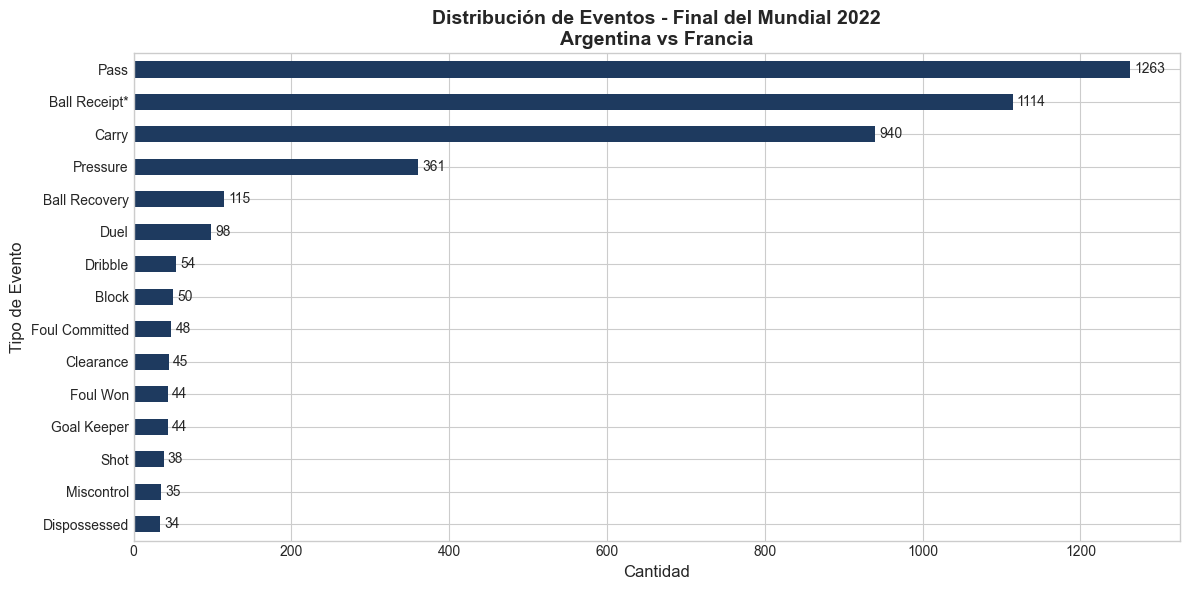

In [13]:
# Visualizar distribución de eventos
fig, ax = plt.subplots(figsize=(12, 6))

event_types.head(15).plot(kind='barh', ax=ax, color=COLORS['primary'])
ax.set_xlabel('Cantidad', fontsize=12)
ax.set_ylabel('Tipo de Evento', fontsize=12)
ax.set_title('Distribución de Eventos - Final del Mundial 2022\nArgentina vs Francia', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Añadir valores
for i, v in enumerate(event_types.head(15)):
    ax.text(v + 5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/event_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Explorar Eventos de Pase

Los pases son el foco de nuestro análisis OART.

In [14]:
# Filtrar solo pases
passes = events[events['type'] == 'Pass'].copy()

print(f"⚽ Total de pases en la final: {len(passes)}")
print(f"\n📋 Columnas específicas de pases:")

# Columnas que empiezan con 'pass_'
pass_columns = [col for col in passes.columns if col.startswith('pass_')]
for col in pass_columns:
    print(f"  - {col}")

⚽ Total de pases en la final: 1263

📋 Columnas específicas de pases:
  - pass_aerial_won
  - pass_angle
  - pass_assisted_shot_id
  - pass_body_part
  - pass_cross
  - pass_deflected
  - pass_end_location
  - pass_goal_assist
  - pass_height
  - pass_inswinging
  - pass_length
  - pass_outcome
  - pass_outswinging
  - pass_recipient
  - pass_recipient_id
  - pass_shot_assist
  - pass_switch
  - pass_technique
  - pass_through_ball
  - pass_type


In [15]:
# Examinar un pase de ejemplo
sample_pass = passes.iloc[0]

print("🔍 EJEMPLO DE EVENTO DE PASE")
print("="*50)
print(f"Jugador: {sample_pass['player']}")
print(f"Equipo: {sample_pass['team']}")
print(f"Minuto: {sample_pass['minute']}:{sample_pass['second']:02d}")
print(f"Posición inicial: {sample_pass['location']}")
print(f"Posición final: {sample_pass['pass_end_location']}")
print(f"Receptor: {sample_pass['pass_recipient']}")
print(f"Tipo de pase: {sample_pass['pass_type']}")
print(f"Altura: {sample_pass['pass_height']}")
print(f"Longitud: {sample_pass['pass_length']:.2f}")
print(f"Ángulo: {sample_pass['pass_angle']:.2f} rad")
print(f"Resultado: {'Completado' if pd.isna(sample_pass['pass_outcome']) else sample_pass['pass_outcome']}")

🔍 EJEMPLO DE EVENTO DE PASE
Jugador: Antoine Griezmann
Equipo: France
Minuto: 0:00
Posición inicial: [61.0, 40.1]
Posición final: [48.0, 43.2]
Receptor: Aurélien Djani Tchouaméni
Tipo de pase: Kick Off
Altura: Ground Pass
Longitud: 13.36
Ángulo: 2.91 rad
Resultado: Completado


In [16]:
# Estadísticas de pases por equipo
pass_stats = passes.groupby('team').agg({
    'id': 'count',
    'pass_length': 'mean',
    'pass_outcome': lambda x: x.isna().sum() / len(x) * 100  # % completados
}).round(2)

pass_stats.columns = ['Total Pases', 'Longitud Media', '% Completados']

print("📊 Estadísticas de pases por equipo:")
print(pass_stats.to_string())

📊 Estadísticas de pases por equipo:
           Total Pases  Longitud Media  % Completados
team                                                 
Argentina          693           20.17          80.81
France             570           22.21          76.14


In [17]:
# Crear columna de éxito (1 = completado, 0 = fallado)
passes['pass_success'] = passes['pass_outcome'].isna().astype(int)

# Distribución de resultados de pases
outcome_dist = passes['pass_outcome'].fillna('Completed').value_counts()

print("📈 Distribución de resultados de pases:")
print(outcome_dist.to_string())

📈 Distribución de resultados de pases:
pass_outcome
Completed       994
Incomplete      232
Out              20
Unknown          10
Pass Offside      7


## 6. Explorar Datos 360° (Freeze Frames)

Los datos 360° son **cruciales** para OART porque nos dan las posiciones de todos los jugadores en el momento del pase.

In [18]:
# Cargar datos 360° de la final
frames = sb.frames(match_id=FINAL_MATCH_ID)

print(f"📊 Total de freeze frames: {len(frames)}")
print(f"\n📋 Columnas disponibles:")
for col in frames.columns:
    print(f"  - {col}")

📊 Total de freeze frames: 61451

📋 Columnas disponibles:
  - id
  - visible_area
  - match_id
  - teammate
  - actor
  - keeper
  - location


In [19]:
# Examinar un freeze frame
sample_frame = frames.iloc[0]

print("🔍 EJEMPLO DE FREEZE FRAME")
print("="*50)
print(f"ID del evento: {sample_frame['id']}")
print(f"Visible area: {sample_frame['visible_area'][:5]}... (coordenadas del polígono visible)")

# El freeze frame contiene lista de jugadores
if 'freeze_frame' in sample_frame and sample_frame['freeze_frame'] is not None:
    ff = sample_frame['freeze_frame']
    print(f"\nJugadores en el frame: {len(ff)}")
    print("\nPrimeros 3 jugadores:")
    for i, player in enumerate(ff[:3]):
        print(f"  {i+1}. Posición: {player['location']}, Teammate: {player['teammate']}, Actor: {player.get('actor', False)}")

🔍 EJEMPLO DE FREEZE FRAME
ID del evento: f651a6c4-55e3-4e0f-a178-59414ba83d6a
Visible area: [8.98496759714251, 80.0, 41.4622037211361, 0.0, 80.3408332033771]... (coordenadas del polígono visible)


In [20]:
# Función para extraer información del freeze frame
def parse_freeze_frame(ff):
    """Convierte freeze frame en DataFrame estructurado."""
    if ff is None or len(ff) == 0:
        return pd.DataFrame()
    
    players = []
    for p in ff:
        players.append({
            'location_x': p['location'][0],
            'location_y': p['location'][1],
            'teammate': p['teammate'],
            'actor': p.get('actor', False),
            'keeper': p.get('keeper', False)
        })
    
    return pd.DataFrame(players)

# Ejemplo
if 'freeze_frame' in sample_frame and sample_frame['freeze_frame'] is not None:
    ff_df = parse_freeze_frame(sample_frame['freeze_frame'])
    print("Freeze frame como DataFrame:")
    print(ff_df.to_string())

## 7. Visualización: Pass Map de un Jugador

Vamos a crear un pass map profesional usando mplsoccer.

In [21]:
# Encontrar el jugador con más pases de Argentina
argentina_passes = passes[passes['team'] == 'Argentina']
top_passer = argentina_passes['player'].value_counts().idxmax()

print(f"🌟 Jugador con más pases de Argentina: {top_passer}")
print(f"   Total de pases: {argentina_passes['player'].value_counts().max()}")

🌟 Jugador con más pases de Argentina: Enzo Fernandez
   Total de pases: 94


In [22]:
# Filtrar pases de ese jugador
player_passes = argentina_passes[argentina_passes['player'] == top_passer].copy()

# Extraer coordenadas
player_passes['start_x'] = player_passes['location'].apply(lambda x: x[0] if x else None)
player_passes['start_y'] = player_passes['location'].apply(lambda x: x[1] if x else None)
player_passes['end_x'] = player_passes['pass_end_location'].apply(lambda x: x[0] if x else None)
player_passes['end_y'] = player_passes['pass_end_location'].apply(lambda x: x[1] if x else None)

# Separar completados y fallados
completed = player_passes[player_passes['pass_success'] == 1]
incomplete = player_passes[player_passes['pass_success'] == 0]

print(f"Pases completados: {len(completed)}")
print(f"Pases fallados: {len(incomplete)}")

Pases completados: 79
Pases fallados: 15


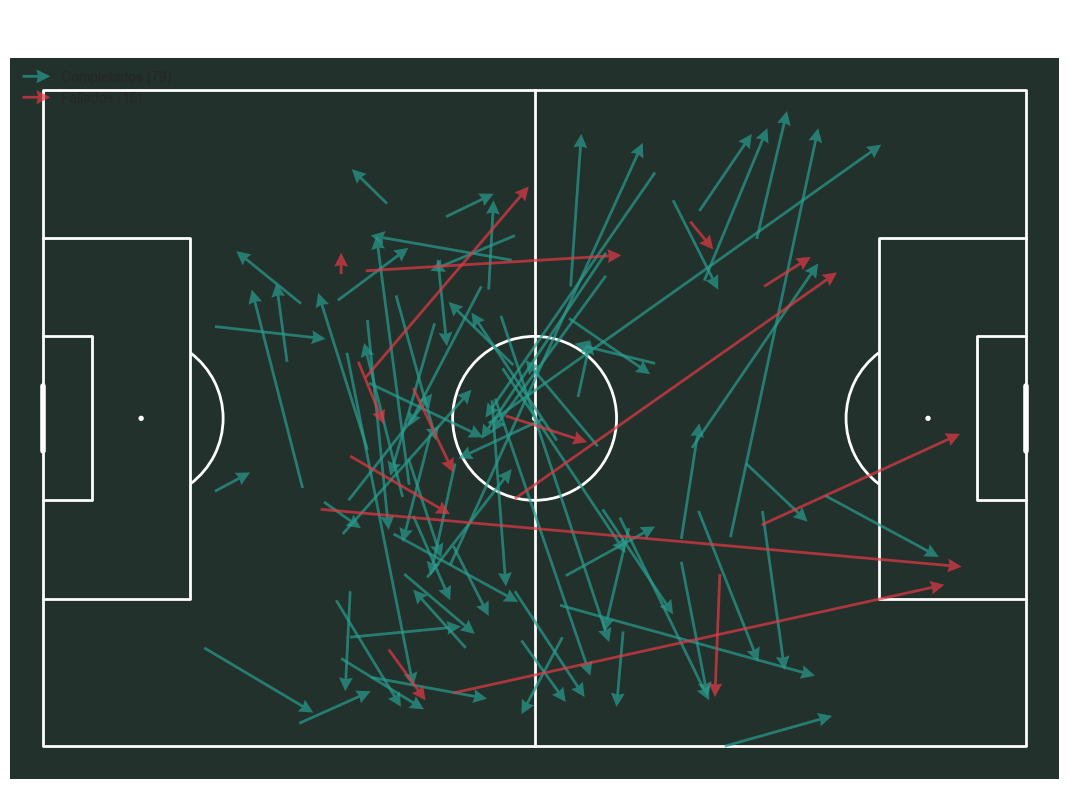

In [23]:
# Crear pass map
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))

# Pases completados (verde)
pitch.arrows(completed['start_x'], completed['start_y'],
             completed['end_x'], completed['end_y'],
             width=2, headwidth=5, headlength=5,
             color=COLORS['success'], alpha=0.7, ax=ax,
             label=f'Completados ({len(completed)})')

# Pases fallados (rojo)
pitch.arrows(incomplete['start_x'], incomplete['start_y'],
             incomplete['end_x'], incomplete['end_y'],
             width=2, headwidth=5, headlength=5,
             color=COLORS['accent'], alpha=0.7, ax=ax,
             label=f'Fallados ({len(incomplete)})')

# Título y leyenda
ax.set_title(f'Pass Map: {top_passer}\nFinal del Mundial 2022 - Argentina vs Francia',
             fontsize=14, fontweight='bold', color='white', pad=10)
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/pass_map_example.png', dpi=150, bbox_inches='tight', facecolor='#22312b')
plt.show()

## 8. Visualización: Freeze Frame con Opciones de Pase

Esta visualización es fundamental para entender OART: muestra todas las opciones disponibles al momento de un pase.

In [ ]:
print("Columnas en frames:")
print(frames.columns.tolist())
print(f"\nPrimeras filas:")
frames.head()

Columnas en frames:
['id', 'visible_area', 'match_id', 'teammate', 'actor', 'keeper', 'location']

Primeras filas:


,id,visible_area,match_id,teammate,actor,keeper,location
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...",3869685,True,False,False,"[39.21695730971832, 44.77861301106889]"
1,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...",3869685,True,False,False,"[39.2235613627218, 29.49684745718256]"
2,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...",3869685,True,False,False,"[42.57667276588051, 67.52374056870202]"
3,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...",3869685,True,False,False,"[46.549119819701936, 12.613254283667075]"
4,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...",3869685,True,False,False,"[47.79830626119247, 43.13070641887103]"


In [41]:
# Los frames vienen "explotados" (una fila por jugador)
# Necesitamos agruparlos por evento (id)

print("Estructura actual de frames:")
print(f"  Filas totales: {len(frames)}")
print(f"  IDs únicos: {frames['id'].nunique()}")
print(f"  Promedio de jugadores por frame: {len(frames) / frames['id'].nunique():.1f}")

# Reconstruir freeze_frame como lista de diccionarios por cada evento
def reconstruct_freeze_frame(group):
    """Convierte las filas de un grupo en una lista de jugadores."""
    players = []
    for _, row in group.iterrows():
        players.append({
            'location': row['location'],
            'teammate': row['teammate'],
            'actor': row['actor'],
            'keeper': row['keeper']
        })
    return players

print("\n⏳ Reconstruyendo freeze frames (esto puede tomar un momento)...")

# Agrupar por id y reconstruir
frames_grouped = frames.groupby('id').apply(reconstruct_freeze_frame).reset_index()
frames_grouped.columns = ['id', 'freeze_frame']

# Añadir visible_area (tomamos el primero de cada grupo, es igual para todos)
visible_areas = frames.groupby('id')['visible_area'].first().reset_index()
frames_grouped = frames_grouped.merge(visible_areas, on='id')

print(f"✅ Freeze frames reconstruidos: {len(frames_grouped)}")
print(f"\nEjemplo de freeze frame reconstruido:")
print(f"  ID: {frames_grouped.iloc[0]['id']}")
print(f"  Jugadores en el frame: {len(frames_grouped.iloc[0]['freeze_frame'])}")

Estructura actual de frames:
  Filas totales: 61451
  IDs únicos: 3683
  Promedio de jugadores por frame: 16.7

⏳ Reconstruyendo freeze frames (esto puede tomar un momento)...
✅ Freeze frames reconstruidos: 3683

Ejemplo de freeze frame reconstruido:
  ID: 0018bfad-064a-47cb-8577-09b5dd716425
  Jugadores en el frame: 17


In [42]:
# Ahora sí podemos unir con los pases
passes_with_frames = passes.merge(
    frames_grouped[['id', 'freeze_frame', 'visible_area']], 
    on='id', 
    how='left'
)

# Filtrar pases con freeze frame disponible
passes_with_ff = passes_with_frames[passes_with_frames['freeze_frame'].notna()]

print(f"Pases con freeze frame: {len(passes_with_ff)} de {len(passes)} ({len(passes_with_ff)/len(passes)*100:.1f}%)")

Pases con freeze frame: 998 de 1263 (79.0%)


In [43]:
# Seleccionar un pase interesante para visualizar
sample_pass_ff = passes_with_ff[
    (passes_with_ff['team'] == 'Argentina') & 
    (passes_with_ff['pass_success'] == 1)
].iloc[10]

print(f"Pase seleccionado:")
print(f"  Jugador: {sample_pass_ff['player']}")
print(f"  Receptor: {sample_pass_ff['pass_recipient']}")
print(f"  Minuto: {sample_pass_ff['minute']}:{sample_pass_ff['second']:02d}")

Pase seleccionado:
  Jugador: Cristian Gabriel Romero
  Receptor: Nicolás Hernán Otamendi
  Minuto: 1:22


In [44]:
# Parsear el freeze frame
ff_data = parse_freeze_frame(sample_pass_ff['freeze_frame'])

# Separar compañeros y oponentes
teammates = ff_data[ff_data['teammate'] == True]
opponents = ff_data[ff_data['teammate'] == False]
actor = ff_data[ff_data['actor'] == True]  # El pasador

# Coordenadas del pase
start_x, start_y = sample_pass_ff['location']
end_x, end_y = sample_pass_ff['pass_end_location']

print(f"Compañeros disponibles: {len(teammates) - 1}")
print(f"Oponentes: {len(opponents)}")

Compañeros disponibles: 9
Oponentes: 10


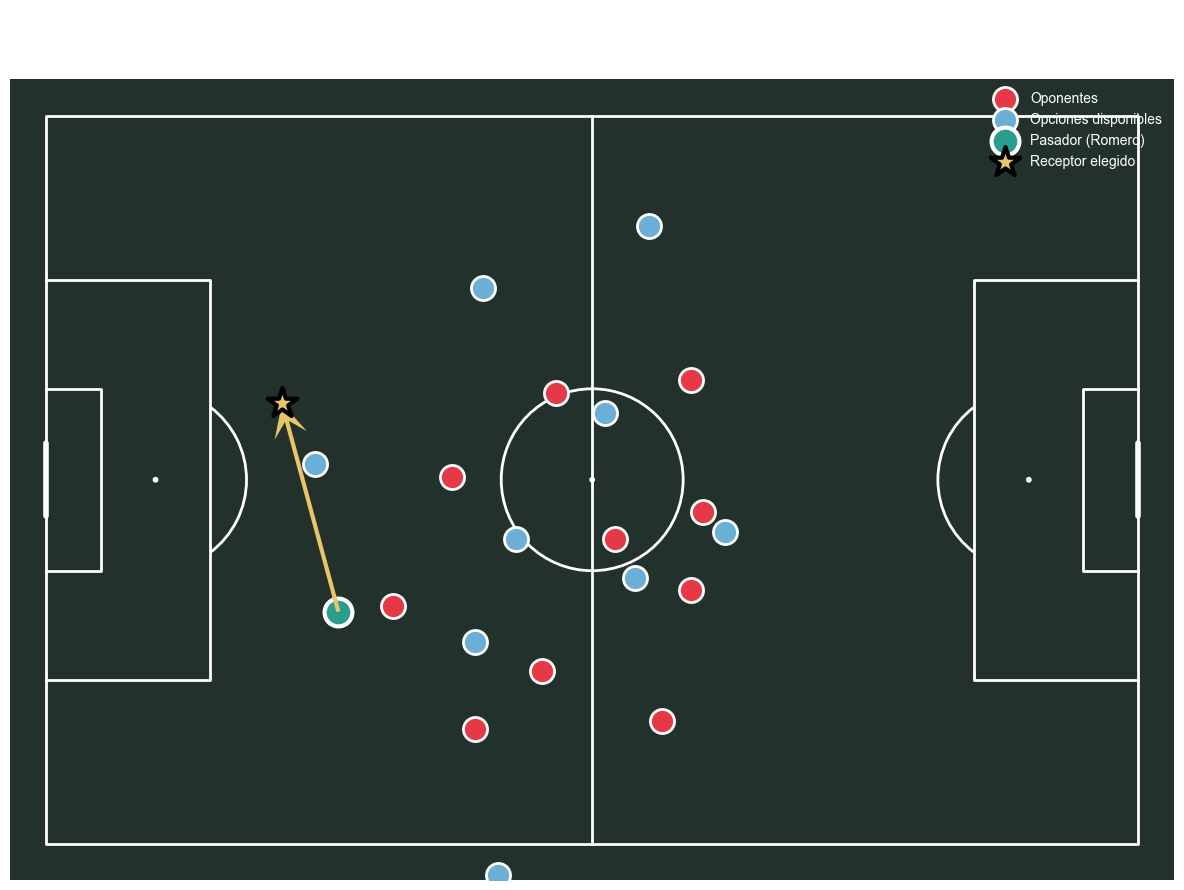


💡 CONCEPTO CLAVE PARA OART:
   El jugador tenía 9 compañeros disponibles.
   OART medirá qué fracción de esas opciones tenía MAYOR probabilidad
   de éxito que la opción elegida.


In [45]:
# Crear visualización del freeze frame
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')
fig, ax = pitch.draw(figsize=(14, 9))

# Dibujar oponentes (rojo)
pitch.scatter(opponents['location_x'], opponents['location_y'],
              s=300, c=COLORS['accent'], edgecolors='white', linewidth=2,
              ax=ax, label='Oponentes', zorder=2)

# Dibujar compañeros disponibles (azul claro) - potenciales receptores
available_teammates = teammates[teammates['actor'] == False]
pitch.scatter(available_teammates['location_x'], available_teammates['location_y'],
              s=300, c='#6BAED6', edgecolors='white', linewidth=2,
              ax=ax, label='Opciones disponibles', zorder=2)

# Dibujar el pasador (verde)
pitch.scatter(start_x, start_y,
              s=400, c=COLORS['success'], edgecolors='white', linewidth=3,
              ax=ax, label=f'Pasador ({sample_pass_ff["player"].split()[-1]})', zorder=3)

# Dibujar el pase realizado (flecha gruesa)
pitch.arrows(start_x, start_y, end_x, end_y,
             width=3, headwidth=8, headlength=8,
             color=COLORS['warning'], ax=ax, zorder=4)

# Marcar el receptor elegido
pitch.scatter(end_x, end_y,
              s=500, c=COLORS['warning'], edgecolors='black', linewidth=3,
              marker='*', ax=ax, label=f'Receptor elegido', zorder=5)

# Título
ax.set_title(f'Freeze Frame: Opciones de Pase\n{sample_pass_ff["player"]} → {sample_pass_ff["pass_recipient"]}\n'
             f'Minuto {sample_pass_ff["minute"]}\' | {len(available_teammates)} opciones disponibles',
             fontsize=14, fontweight='bold', color='white', pad=10)

ax.legend(loc='upper right', fontsize=10, facecolor='#22312b', labelcolor='white')

plt.tight_layout()
plt.savefig('../outputs/figures/freeze_frame_options.png', dpi=150, bbox_inches='tight', facecolor='#22312b')
plt.show()

print("\n💡 CONCEPTO CLAVE PARA OART:")
print(f"   El jugador tenía {len(available_teammates)} compañeros disponibles.")
print(f"   OART medirá qué fracción de esas opciones tenía MAYOR probabilidad")
print(f"   de éxito que la opción elegida.")

## 9. Cargar Datos de Todos los Partidos

Para entrenar nuestro modelo, necesitamos datos de todos los partidos del torneo.

In [26]:
# Función para cargar eventos de múltiples partidos
def load_all_match_events(match_ids, event_type='Pass'):
    """Carga eventos de tipo específico de múltiples partidos."""
    all_events = []
    
    for match_id in tqdm(match_ids, desc=f"Cargando {event_type} events"):
        try:
            events = sb.events(match_id=match_id)
            if event_type:
                events = events[events['type'] == event_type]
            events['match_id'] = match_id
            all_events.append(events)
        except Exception as e:
            print(f"Error en partido {match_id}: {e}")
    
    return pd.concat(all_events, ignore_index=True)

# Función para cargar freeze frames de múltiples partidos
def load_all_frames(match_ids):
    """Carga freeze frames de múltiples partidos."""
    all_frames = []
    
    for match_id in tqdm(match_ids, desc="Cargando freeze frames"):
        try:
            frames = sb.frames(match_id=match_id)
            frames['match_id'] = match_id
            all_frames.append(frames)
        except Exception as e:
            print(f"Error en partido {match_id}: {e}")
    
    return pd.concat(all_frames, ignore_index=True)

In [27]:
# Cargar todos los pases del torneo
# NOTA: Esto puede tomar varios minutos

match_ids = matches['match_id'].tolist()

print(f"Cargando datos de {len(match_ids)} partidos...")
print("(Esto puede tomar 5-10 minutos)\n")

all_passes = load_all_match_events(match_ids, event_type='Pass')
print(f"\n✅ Total de pases cargados: {len(all_passes)}")

Cargando datos de 64 partidos...
(Esto puede tomar 5-10 minutos)



Cargando Pass events: 100%|██████████| 64/64 [01:25<00:00,  1.33s/it]



✅ Total de pases cargados: 68515


In [36]:
# Cargar todos los freeze frames
print("Cargando freeze frames...\n")

all_frames = load_all_frames(match_ids)
print(f"\n✅ Total de freeze frames cargados: {len(all_frames)}")

Cargando freeze frames...



Cargando freeze frames: 100%|██████████| 64/64 [02:13<00:00,  2.08s/it]


✅ Total de freeze frames cargados: 3084876


In [49]:


print("📊 Estructura de all_frames:")
print(f"   Filas totales: {len(all_frames):,}")
print(f"   IDs únicos: {all_frames['id'].nunique():,}")
print(f"   Promedio de jugadores por frame: {len(all_frames) / all_frames['id'].nunique():.1f}")

# Función para reconstruir freeze frame
def reconstruct_freeze_frame(group):
    """Convierte las filas de un grupo en una lista de jugadores."""
    players = []
    for _, row in group.iterrows():
        players.append({
            'location': row['location'],
            'teammate': row['teammate'],
            'actor': row['actor'],
            'keeper': row['keeper']
        })
    return players

print("\n⏳ Reconstruyendo freeze frames de todos los partidos...")
print("   (Esto puede tomar 2-5 minutos)\n")

# Agrupar por id y match_id, y reconstruir
all_frames_grouped = all_frames.groupby(['id', 'match_id']).apply(
    reconstruct_freeze_frame
).reset_index()
all_frames_grouped.columns = ['id', 'match_id', 'freeze_frame']

# Añadir visible_area
visible_areas = all_frames.groupby(['id', 'match_id'])['visible_area'].first().reset_index()
all_frames_grouped = all_frames_grouped.merge(visible_areas, on=['id', 'match_id'])

print(f"✅ Freeze frames reconstruidos: {len(all_frames_grouped):,}")

📊 Estructura de all_frames:
   Filas totales: 3,084,876
   IDs únicos: 203,887
   Promedio de jugadores por frame: 15.1

⏳ Reconstruyendo freeze frames de todos los partidos...
   (Esto puede tomar 2-5 minutos)

✅ Freeze frames reconstruidos: 203,887


In [51]:
# Ahora sí unir pases con freeze frames
passes_complete = all_passes.merge(
    all_frames_grouped[['id', 'match_id', 'freeze_frame', 'visible_area']],
    on=['id', 'match_id'],
    how='left'
)

# Estadísticas
with_ff = passes_complete['freeze_frame'].notna().sum()
total = len(passes_complete)

print(f"📊 Resumen de datos:")
print(f"   Total de pases: {total:,}")
print(f"   Con freeze frame: {with_ff:,} ({with_ff/total*100:.1f}%)")
print(f"   Sin freeze frame: {total - with_ff:,} ({(total-with_ff)/total*100:.1f}%)")

📊 Resumen de datos:
   Total de pases: 68,515
   Con freeze frame: 57,392 (83.8%)
   Sin freeze frame: 11,123 (16.2%)


In [52]:
# Guardar datos procesados
passes_complete.to_pickle('../data/processed/all_passes_wc2022.pkl')
print("✅ Datos guardados en: data/processed/all_passes_wc2022.pkl")

✅ Datos guardados en: data/processed/all_passes_wc2022.pkl


## 10. Resumen y Próximos Pasos

### Lo que aprendimos en este notebook:

1. ✅ Cómo conectar con StatsBomb Open Data
2. ✅ Estructura de competiciones, partidos y eventos
3. ✅ Anatomía de un evento de pase
4. ✅ Datos 360° (freeze frames) y su importancia para OART
5. ✅ Visualizaciones profesionales con mplsoccer

### Estadísticas clave del dataset:
- **64 partidos** del Mundial 2022
- **~68,000 eventos de pase**
- **~82% con datos 360°** disponibles

### En el próximo notebook:
- Ingeniería de características para el modelo de pases
- Entrenamiento del modelo XGBoost
- Evaluación con AUC y calibración

---

**Continúa con:** `02_pass_success_model.ipynb`

In [53]:
# Estadísticas finales del notebook
print("="*60)
print("📊 RESUMEN DEL DATASET - FIFA WORLD CUP 2022")
print("="*60)
print(f"Partidos analizados:     {len(matches)}")
print(f"Equipos participantes:   {len(all_teams)}")
print(f"Total de pases:          {len(all_passes):,}")
print(f"Pases con 360°:          {with_ff:,} ({with_ff/total*100:.1f}%)")
print(f"Jugadores únicos:        {all_passes['player'].nunique()}")
print("="*60)

📊 RESUMEN DEL DATASET - FIFA WORLD CUP 2022
Partidos analizados:     64
Equipos participantes:   32
Total de pases:          68,515
Pases con 360°:          57,392 (83.8%)
Jugadores únicos:        676
